## Learning objectives for this notebook
- Interpret and apply an array of visualizations summarizing the relationship between a categorical and a number feature

Then moving toward *modeling*:
- Describe the difference between a variable and a set of observations
- Describe categorical and number variables, and the difference between them


First let's load in our data

In [ ]:
import pandas as pd
geno = pd.read_table("../Data/arabmagic/arabmagic_geno.csv", sep=",",skiprows=3,index_col=0)
pmap = pd.read_table("../Data/arabmagic/arabmagic_pmap_tair9.csv", sep=",",skiprows=3,index_col=0)
pheno = pd.read_table("../Data/arabmagic/arabmagic_pheno.csv", sep=",",skiprows=3,index_col=0)
counts = pd.read_table("../Data/eco_data/species_counts.txt")
sites = pd.read_table("../Data/eco_data/eco_sites.txt")


And the new files we made. How does this work for you? Look at the data frames to check

In [ ]:
fruit_length_geno = pd.read_table("../Data/arabmagic/fruit_length_geno.csv",sep=",")
gwas_plus_pmap = pd.read_table("../Data/arabmagic/gwas_plus_pmap.csv",sep=",")

In [ ]:
fruit_length_geno.head()

## 1 "categorical plots" `catplots`: Boxplots, violin plots & company
Using `catplots` we can plot a number feature and a categorical feature together, to do a similar comparison as our pair of histograms

Continuing with the fruit_length, we can plot the same comparison in many different ways.

### 1.1 Strip plot
This adds "jitter" to the categorical variable to make it easier to visualize.

In [ ]:
sns.catplot(x="MASC06116", y="fruit_length", data=fruit_length_geno)

**Exercise 1.1**: What are the axes? What are the data points? How can you interpret this plot?

In [ ]:
sns.catplot(x="MASC06116", y="fruit_length", data=fruit_length_geno, jitter =False)

**Exercise 1.2**: what happened now? Explain the purpose of the `jitter`. What is the default value for `jitter`

### 1.2 Box plot
Using the same `catplot` function we can do other plots. 

Here's a box plot. Box plot legend [here](https://wilkelab.org/SDS375/slides/visualizing-distributions-2.html#10).


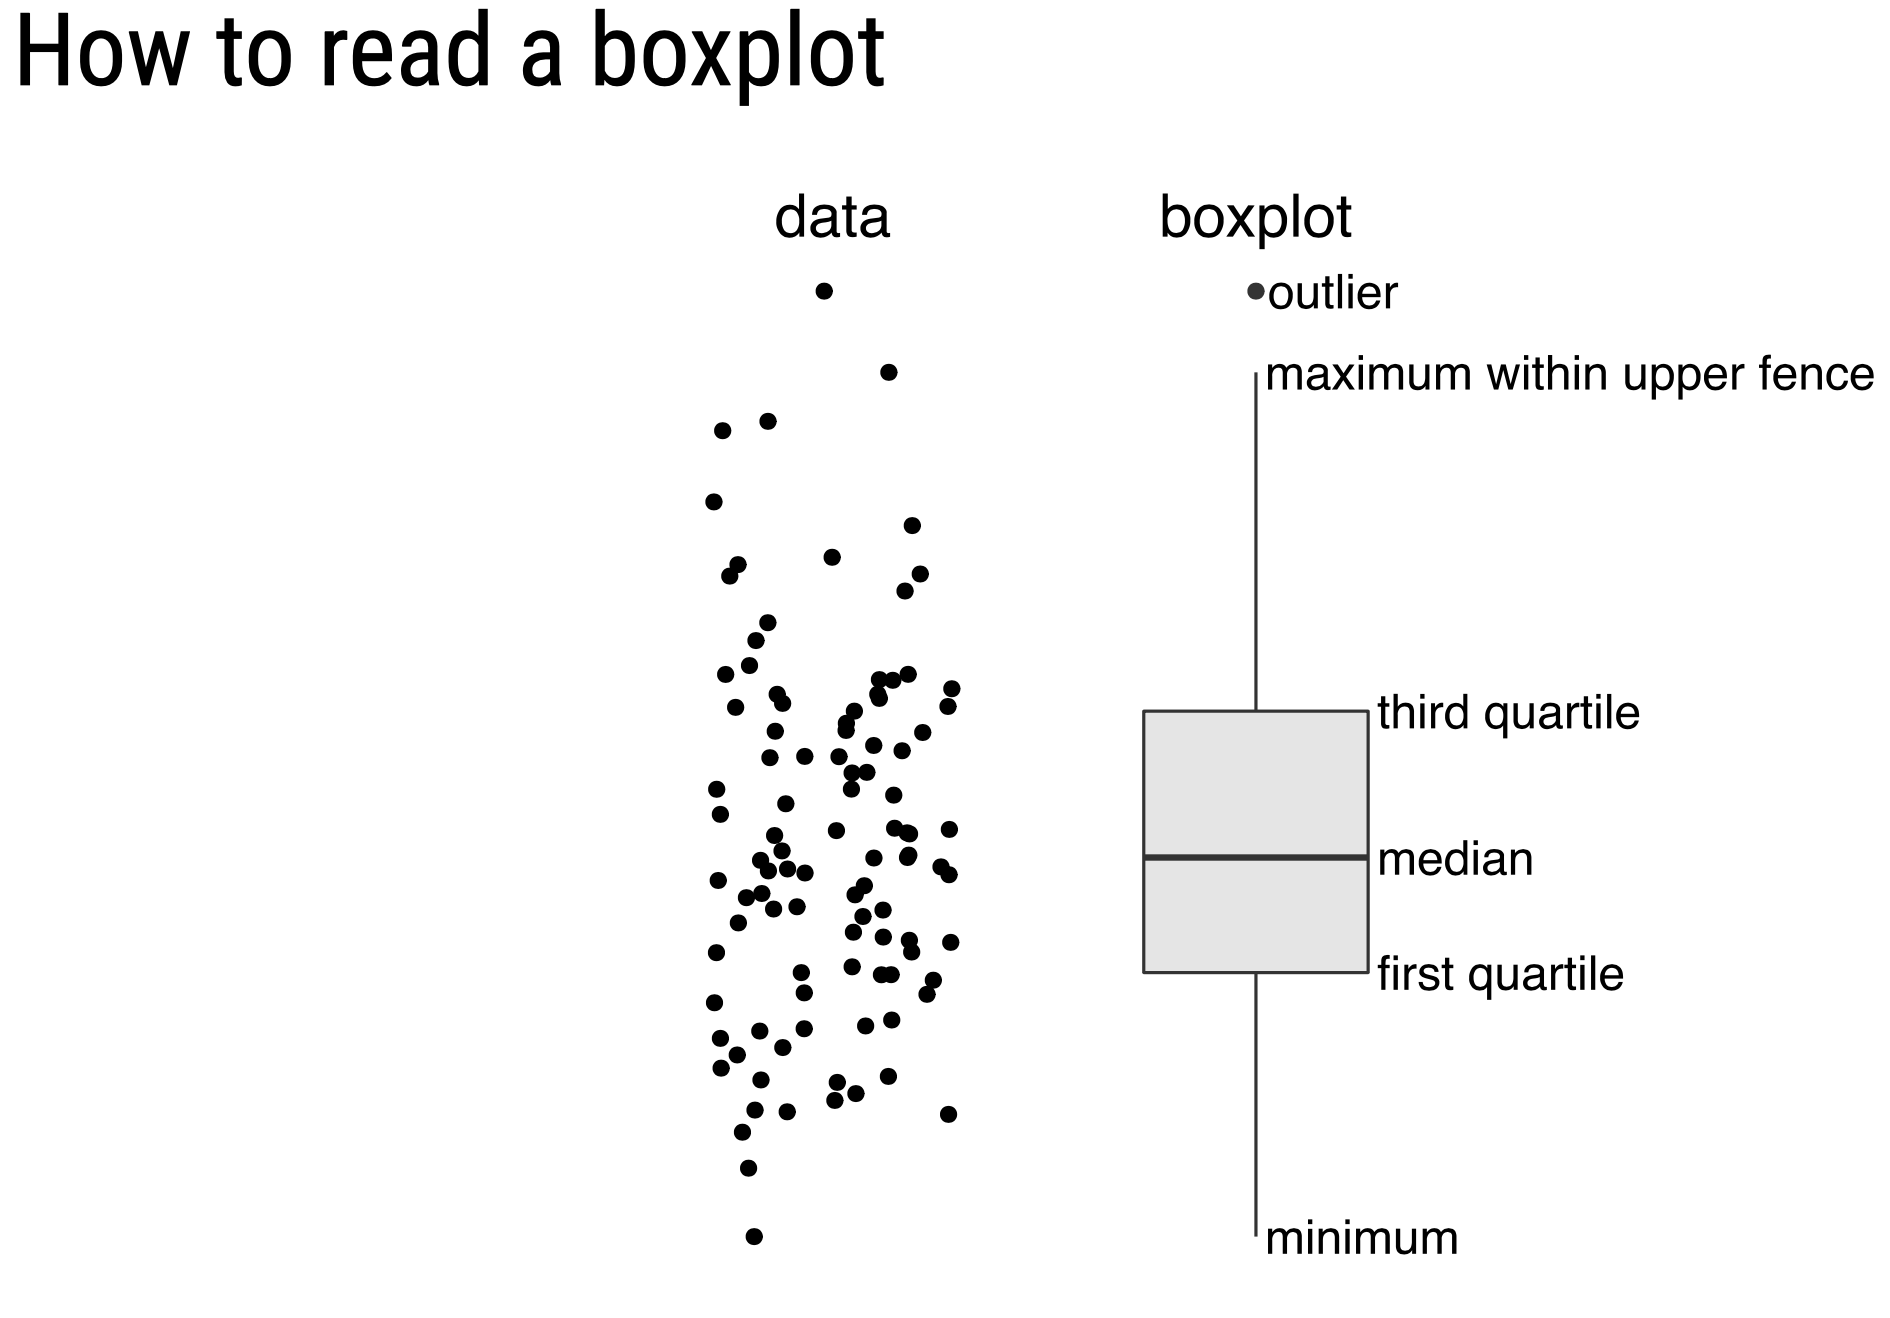

![box plot](https://codingwithmax.com/wp-content/uploads/2019/11/box-plot-vertical-horizontal-1.png "box plot")

In [ ]:
sns.catplot(y="fruit_length", x="MASC06116", kind="box", data=fruit_length_geno)


**Exercise 1.3**: get the fruit length data for the plants with genotype of A at marker MASC06116. Run the `describe` function on this Series to compare the results to the box plot above

We can also flip the axes:

In [ ]:
sns.catplot(x="fruit_length", y="MASC06116", kind="box", data=fruit_length_geno)


In [ ]:
sns.catplot(x="fruit_length", y="MASC06116", kind="violin", data=fruit_length_geno)


**Exercise 1.4**: Compare the violin plot above to the box plot, the strip plots, and the previous histogram we made (copied below). What's the same? What's different?

In [ ]:
sns.displot(data=fruit_length_geno, x="fruit_length", hue='MASC06116',stat='density',common_norm=False, kde=True)

**Exercise 1.5**: Look through the [documentation](https://seaborn.pydata.org/tutorial/categorical.html#categorical-scatterplots) of various options of Seaborn plots for a catagorical with a number feature. Make one other plot involving a categorical and a number feature, of your choosing, using any of the data sets.

In [ ]:
sns.catplot(x="has_mega", y="Elevation", data=sites, kind="violin", inner="stick", split=True,
            palette="pastel")

## 1.2 Figure legend (aka caption)
For one of the following figures, look at the figure and its legend. Write a less expert-level figure legend for each one:
- Figure 4 from [Parr 2016](https://onlinelibrary.wiley.com/doi/10.1111/icad.12211)
- Figure 2A from [Forner 2021](https://www.nature.com/articles/s41597-021-01054-y/figures/2)
- Pick a figure from [this post](https://ourworldindata.org/soy?country=)

## 2. Introducing types of variables

I already mentioned another word for a feature is a variable.

While variables in programming are placeholders for specific values, the word is taken from statistics or math where a variable is a placeholder for a number that can take on certain values. 

By gathering **observations** we are learning about these **variables**. In the end we don't care about the particular 677 plants, we only care about the biology of how genotype shapes phenotype.

**Exercise 2.1**: Let's say we got 400 new plants. What do you expect to see when you look at the data for these new plants on MASC06116 and fruit_length

Generally, in a DataFrame, we have features that are all of one variable type (as in our `lakes` dataframe columns).

**Exercise 2.2**: For each of the following variables, describe:

- Minimum value (if any)
- Maximum value (if any)
- One kind of value that is not valid
    
A. `Columba_pulchricollis` (counts data frame):
    
B. `MN5_26437895` (geno data frame)

C. `fruit_length` (pheno data frame)

D. `native_name` (lakes data frame)

E. `shared_canada` (lakes data frame)

**Exercise 2.3**: Create a histogram (distribution plot) for fruit_length and for MASC06116. Describe what is similar and what different about the axes and other characteristics of these two plots. 

**Exercise 2.4**: Use the `describe` function on both features. How is the result of `describe` different between the 2? Compare the results to the histogram you just made. 

A **distribution** describes how commonly different values of a feature are. 

For numbers, they are often a "bell curve" (no relation to the book), such as things like:
- total number of birds in a forest
- fruit length
- human height
 
Sometimes they are not a bell curve but have other shapes, but the bell curve is very common because, intuitively, many variables have a "very common" value, a "somewhat common but high" and "somewhat common but low" value. Also, many variables have roughly symmetric likelihood fof seeing aa value.

**Exercise 2.5**: Describe what is a "very common", "somewhat common but high", and "very high" value for fruit length

**Exercise 2.6**: If you got a new plant at random, what do you think is the approximate chance the  plant's genotype at  MASC06116  will be an A?